In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import shapiro

In [2]:
hr= pd.read_csv("hr train data.csv")
hr.head()

,sno,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


In [3]:
hr.columns

Index(['sno', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sno                     19158 non-null  int64  
 1   enrollee_id             19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   city_development_index  19158 non-null  float64
 4   gender                  19158 non-null  object 
 5   relevent_experience     19158 non-null  object 
 6   enrolled_university     18772 non-null  object 
 7   education_level         19158 non-null  object 
 8   major_discipline        19158 non-null  object 
 9   experience              19093 non-null  float64
 10  company_size            13220 non-null  object 
 11  company_type            13018 non-null  object 
 12  last_new_job            18735 non-null  object 
 13  training_hours          19158 non-null  int64  
 14  job_change              19158 non-null

In [5]:
(hr.isnull().sum()/len(hr))*100

sno                        0.000000
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        2.014824
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [6]:
hr.drop(["sno","enrollee_id"], axis=1, inplace=True)

In [7]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [8]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [9]:
hr.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


##### Null value imputation for enrolled university

In [10]:
hr.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [11]:
pd.set_option("display.max_rows", None)

In [12]:
hr.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [13]:
hr.enrolled_university.fillna("no_enrollment",inplace=True)

In [14]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

##### Null value imputation for last new job

In [15]:
hr.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [16]:
hr.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [17]:
hr[(hr.relevent_experience=="No relevent experience") & (hr.last_new_job=="never")].count()

city                      1751
city_development_index    1751
gender                    1751
relevent_experience       1751
enrolled_university       1751
education_level           1751
major_discipline          1751
experience                1744
company_size               170
company_type               377
last_new_job              1751
training_hours            1751
job_change                1751
dtype: int64

In [18]:
hr[(hr.relevent_experience=="Has relevent experience")]["last_new_job"].value_counts()

1        6018
>4       2765
2        2370
4         876
3         839
never     701
Name: last_new_job, dtype: int64

In [19]:
hr[(hr.relevent_experience=="Has relevent experience") & (hr.last_new_job.isnull())]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
58,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,Oct-49,Funded Startup,NaN,32,YES
205,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,NaN,7,YES
391,city_90,0.698,Male,Has relevent experience,Full time course,Masters,No Major,NaN,NaN,NaN,NaN,44,YES
575,city_45,0.890,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Pvt Ltd,NaN,62,NO
719,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11.0,NaN,NaN,NaN,11,YES
770,city_16,0.910,Male,Has relevent experience,Full time course,Masters,STEM,5.0,50-99,NaN,NaN,92,NO
891,city_146,0.735,Male,Has relevent experience,Full time course,Graduate,STEM,3.0,100-500,NaN,NaN,18,NO
909,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,5000-9999,Pvt Ltd,NaN,14,NO
994,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,100-500,NaN,NaN,37,YES
1187,city_74,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,Oct-49,NaN,NaN,57,NO


<AxesSubplot:>

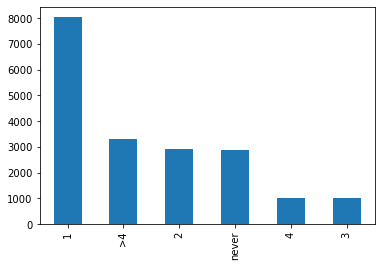

In [20]:
hr.last_new_job.fillna("never").value_counts().plot.bar() 
# checking if filling with never will make changes in overall distribution 

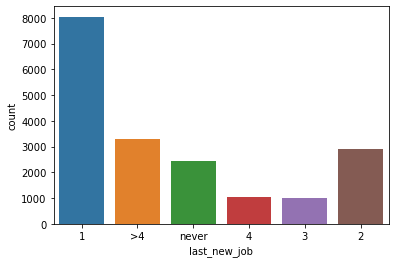

In [21]:
sns.countplot(x="last_new_job", data=hr) #distrobution without filling na with never
plt.show()

In [22]:
hr.last_new_job.fillna("never",inplace=True)

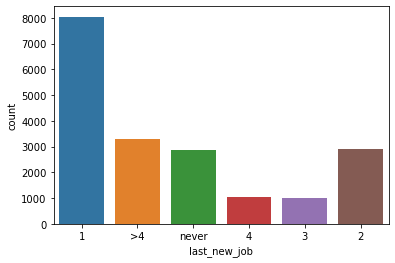

In [23]:
sns.countplot(x="last_new_job", data=hr) # dist still intact
plt.show()

##### null value imputation for company type

In [24]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               0.000000
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [25]:
hr.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [26]:
hr.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [27]:
hr.company_type.fillna("Other", inplace=True) #if compnay_type not known make sense to will with other 

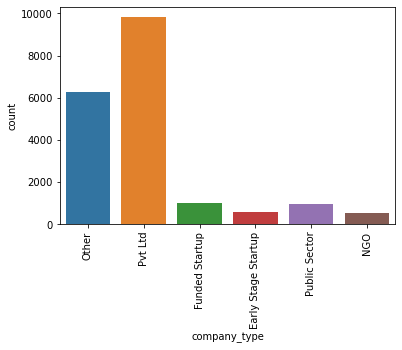

In [28]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()

##### Null value imputation for experience

In [29]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                  65
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

In [30]:
hr.experience.unique()

array([20., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., nan])

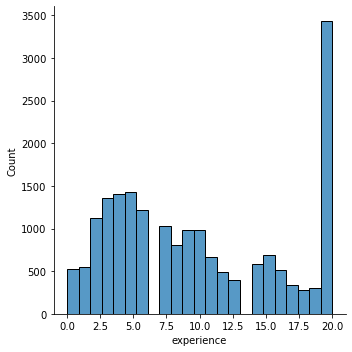

In [31]:
sns.displot(hr.experience)
plt.show()

In [32]:
hr.groupby("relevent_experience")["experience"].median()

relevent_experience
Has relevent experience    10.0
No relevent experience      4.0
Name: experience, dtype: float64

In [33]:
hr.loc[(hr.relevent_experience=="Has relevent experience") & (hr.experience.isnull()), "experience"]=10.0
hr.loc[(hr.relevent_experience=="No relevent experience") & (hr.experience.isnull()), "experience"]=4.0

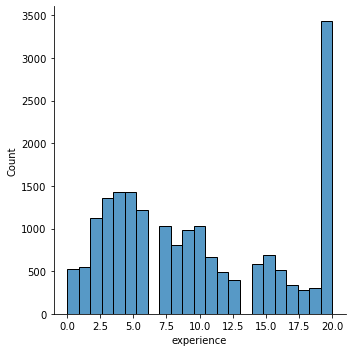

In [34]:
sns.displot(hr.experience)
plt.show()

In [35]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

##### Null value imputation for company size

In [36]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [37]:
hr.company_size= hr.company_size.str.replace("Oct-49","49")

In [38]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
49           1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [39]:
hr.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '49',
       '100-500', '500-999'], dtype=object)

In [40]:
hr[hr.company_size.isnull()]["company_type"].value_counts()

Other                  5368
Pvt Ltd                 406
Public Sector           129
NGO                      26
Funded Startup            6
Early Stage Startup       3
Name: company_type, dtype: int64

In [41]:
hr.groupby("company_type")["company_size"].value_counts()

company_type         company_size
Early Stage Startup  <10              286
                     49               176
                     50-99            109
                     100-500           27
                     500-999            2
Funded Startup       50-99            390
                     100-500          214
                     49               193
                     <10              144
                     500-999           54
NGO                  100-500          174
                     50-99             77
                     1000-4999         73
                     10000+            37
                     500-999           37
                     <10               36
                     49                32
                     5000-9999         29
Other                50-99            240
                     100-500          172
                     49               117
                     10000+            93
                     <10               79


In [42]:
hr.groupby("company_type")["company_size"].count()

company_type
Early Stage Startup     600
Funded Startup          995
NGO                     495
Other                   893
Public Sector           826
Pvt Ltd                9411
Name: company_size, dtype: int64

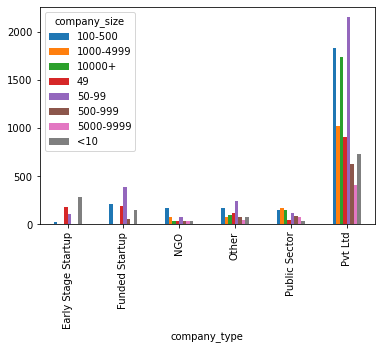

In [43]:
pd.crosstab(hr.company_type,hr.company_size).plot.bar()
plt.show()

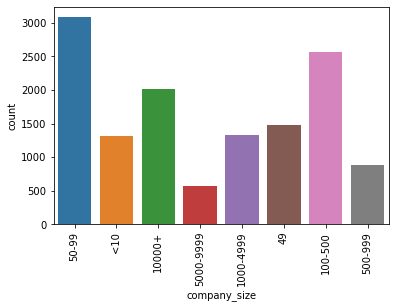

In [44]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()

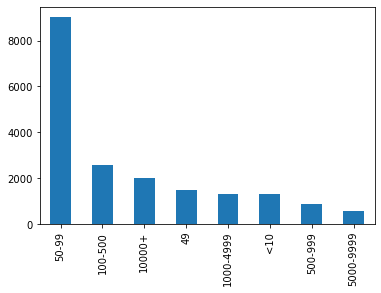

In [45]:
hr.company_size.fillna("50-99").value_counts().plot.bar() 
plt.show()
# if we fill by 50-90 the count of 50-90 will drastically increase from 3000 to 8000

In [46]:
hr.loc[(hr.company_type=="Other") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Early Stage Startup") & (hr.company_size.isnull()), "company_size"]="<10"
hr.loc[(hr.company_type=="Funded Startup") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Public Sector") & (hr.company_size.isnull()), "company_size"]="1000-4999"
hr.loc[(hr.company_type=="NGO") & (hr.company_size.isnull()), "company_size"]="100-500"
hr.loc[(hr.company_type=="Pvt Ltd") & (hr.company_size.isnull()), "company_size"]="50-99"

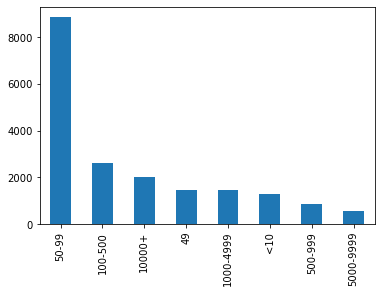

In [47]:
hr.company_size.value_counts().plot.bar()
plt.show()

## UNIVARIATE ANALYSIS

### CATEGORICAL COL

In [48]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [49]:
def uni_cat(x):
    sns.countplot(x=x, data=hr)
    plt.show()
    print(hr[x].value_counts(normalize=True)*100)
    print("the category with highest number of frequency is ",hr[x].mode()[0])

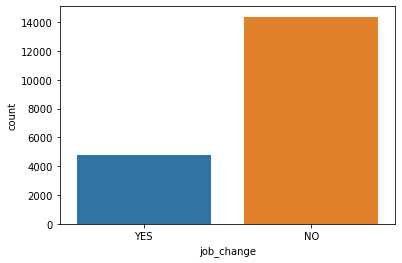

NO     75.065247
YES    24.934753
Name: job_change, dtype: float64
the category with highest number of frequency is  NO


In [50]:
uni_cat("job_change")

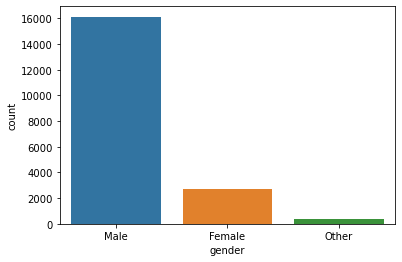

Male      84.173713
Female    14.046351
Other      1.779935
Name: gender, dtype: float64
the category with highest number of frequency is  Male


In [51]:
uni_cat("gender")

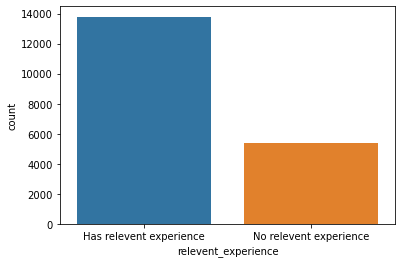

Has relevent experience    71.990813
No relevent experience     28.009187
Name: relevent_experience, dtype: float64
the category with highest number of frequency is  Has relevent experience


In [52]:
uni_cat("relevent_experience")

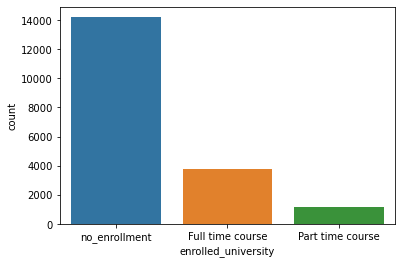

no_enrollment       74.136131
Full time course    19.610607
Part time course     6.253262
Name: enrolled_university, dtype: float64
the category with highest number of frequency is  no_enrollment


In [53]:
uni_cat("enrolled_university")

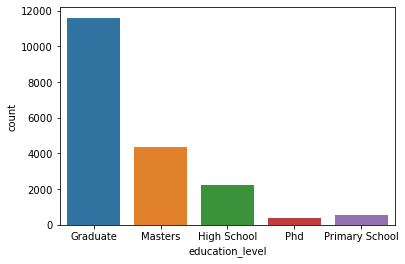

Graduate          60.538678
Masters           22.763336
High School       11.728782
Primary School     2.808226
Phd                2.160977
Name: education_level, dtype: float64
the category with highest number of frequency is  Graduate


In [54]:
uni_cat("education_level")

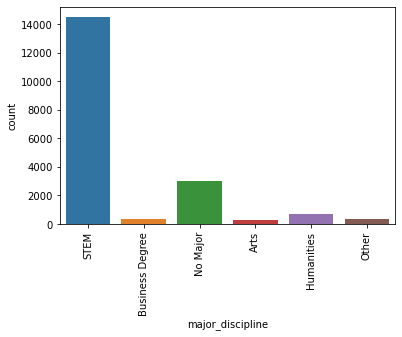

STEM               75.644639
No Major           15.847166
Humanities          3.492014
Other               1.988725
Business Degree     1.706859
Arts                1.320597
Name: major_discipline, dtype: float64
the category with highest number of frequency is  STEM


In [55]:
sns.countplot(x="major_discipline", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["major_discipline"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["major_discipline"].mode()[0])

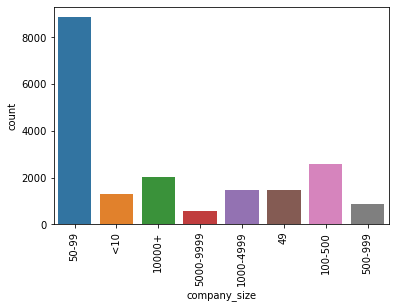

50-99        46.262658
100-500      13.555695
10000+       10.538678
49            7.678255
1000-4999     7.605178
<10           6.843094
500-999       4.577722
5000-9999     2.938720
Name: company_size, dtype: float64
the category with highest number of frequency is  50-99


In [56]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_size"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_size"].mode()[0])

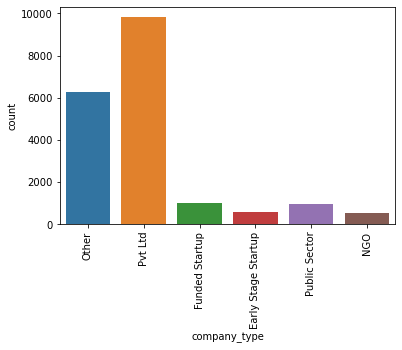

Pvt Ltd                51.242301
Other                  32.680864
Funded Startup          5.224971
Public Sector           4.984863
Early Stage Startup     3.147510
NGO                     2.719491
Name: company_type, dtype: float64
the category with highest number of frequency is  Pvt Ltd


In [57]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_type"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_type"].mode()[0])

### NUMERICAL COL

In [58]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [59]:
def uni_num(x):
    sns.displot(hr[x])
    plt.show()
    sns.boxplot(x=x,data=hr)
    plt.show()
    print("skewness of the ",x,"column is ",hr[x].skew())
    probplot(hr[x],plot=plt)
    plt.show()

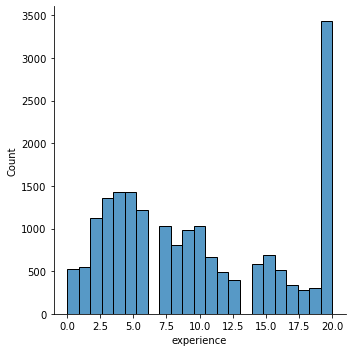

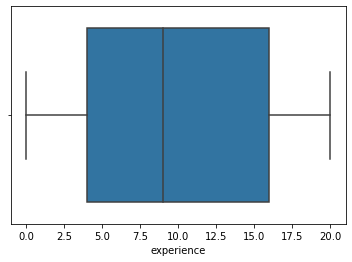

skewness of the  experience column is  0.3410292909488931


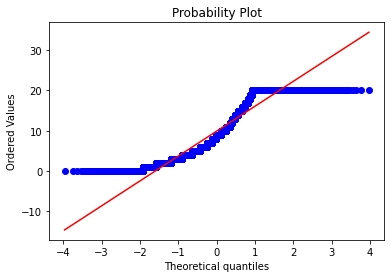

In [60]:
uni_num("experience")

In [61]:
hr.experience.describe()

count    19158.000000
mean         9.921704
std          6.497186
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         20.000000
Name: experience, dtype: float64

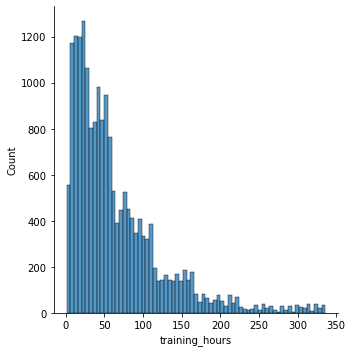

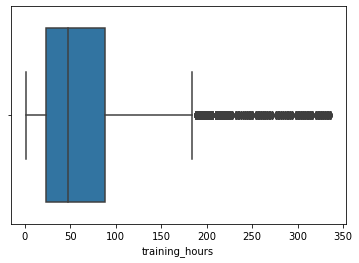

skewness of the  training_hours column is  1.8192372420221026


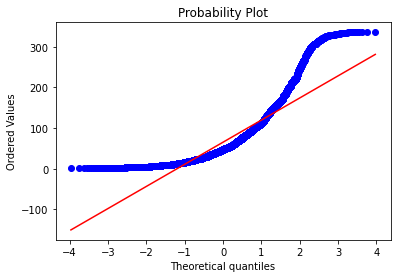

In [62]:
uni_num("training_hours")

In [63]:
hr.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

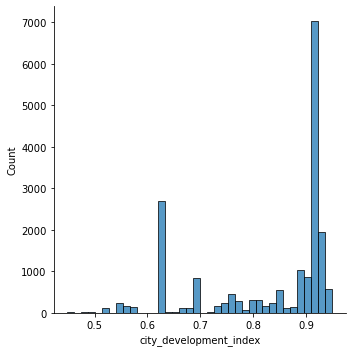

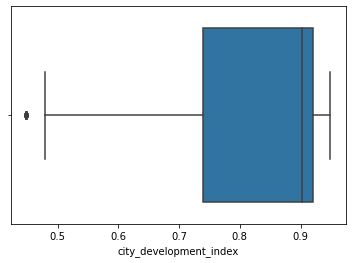

skewness of the  city_development_index column is  -0.9954275351977435


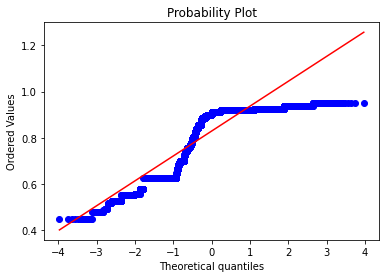

In [64]:
uni_num("city_development_index")

### BIVARIATE ANALYSIS

#### NUM VS NUM

In [65]:
def binum(x,y):
    sns.scatterplot(x=x,y=y,data=hr)
    plt.show()

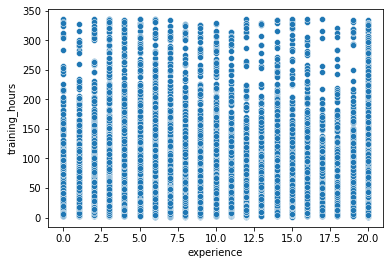

In [66]:
binum("experience","training_hours")

#### NUM VS CAT

In [146]:
def catvnum(x,y):
    sns.boxplot(x=x,y=y,data=hr)
    plt.show()

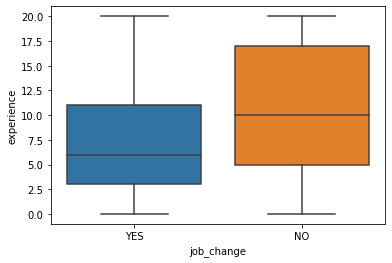

In [68]:
catvnum("job_change","experience")

In [69]:
hr.groupby("job_change")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,10.588068,6.491032,0.0,5.0,10.0,17.0,20.0
YES,4777.0,7.915637,6.091035,0.0,3.0,6.0,11.0,20.0


In [70]:
hr.groupby("job_change")["experience"].skew()

job_change
NO     0.208524
YES    0.798224
Name: experience, dtype: float64

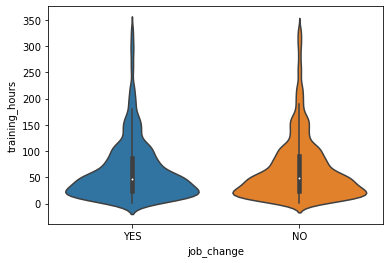

In [72]:
sns.violinplot(x="job_change",y="training_hours",data=hr)
plt.show()

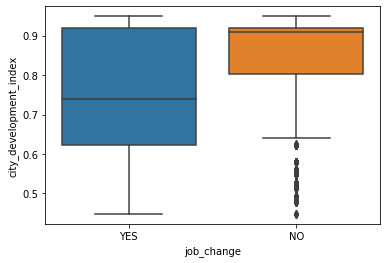

In [73]:
catvnum("job_change","city_development_index")

In [74]:
hr.groupby("job_change")["city_development_index"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,0.853139,0.105354,0.448,0.804,0.91,0.92,0.949
YES,4777.0,0.755719,0.143166,0.448,0.624,0.74,0.92,0.949


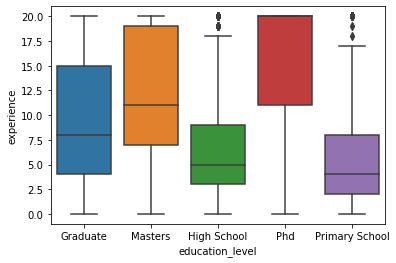

In [147]:
catvnum("education_level","experience")

In [148]:
hr.groupby("education_level")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Graduate,11598.0,9.811433,6.384456,0.0,4.0,8.0,15.0,20.0
High School,2247.0,6.512239,5.479965,0.0,3.0,5.0,9.0,20.0
Masters,4361.0,11.860812,6.298473,0.0,7.0,11.0,19.0,20.0
Phd,414.0,15.917874,5.580407,0.0,11.0,20.0,20.0,20.0
Primary School,538.0,6.206320,5.746037,0.0,2.0,4.0,8.0,20.0


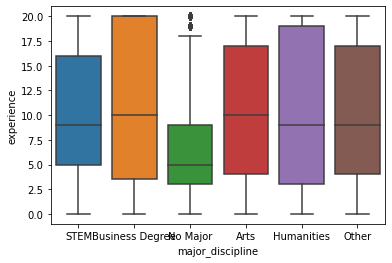

In [149]:
catvnum("major_discipline","experience")

In [150]:
hr.groupby("major_discipline")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
major_discipline,,,,,,,,
Arts,253.0,10.288538,6.890855,0.0,4.0,10.0,17.0,20.0
Business Degree,327.0,10.727829,7.460073,0.0,3.5,10.0,20.0,20.0
Humanities,669.0,10.168909,7.397393,0.0,3.0,9.0,19.0,20.0
No Major,3036.0,6.798419,5.789004,0.0,3.0,5.0,9.0,20.0
Other,381.0,10.149606,6.822654,0.0,4.0,9.0,17.0,20.0
STEM,14492.0,10.534019,6.366014,0.0,5.0,9.0,16.0,20.0


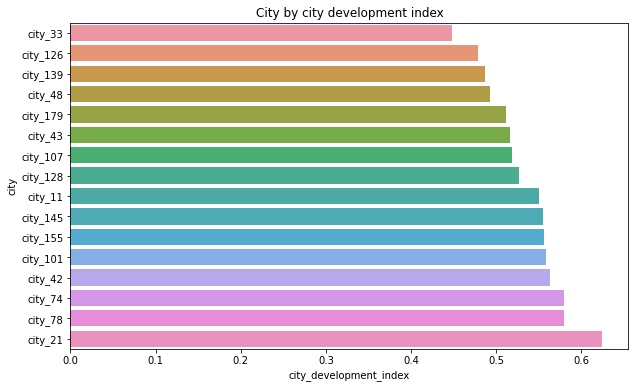

In [81]:
cdi = hr.sort_values(by='city_development_index', ascending=True)[0:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=hr.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

##### CAT VS CAT

In [107]:
def crosstab(x,y):
    print(pd.crosstab(x,y,normalize="index")*100)
    pd.crosstab(x,y,normalize="index").plot(kind='bar')

job_change         NO        YES
gender                          
Female      71.906355  28.093645
Male        75.703832  24.296168
Other       69.794721  30.205279


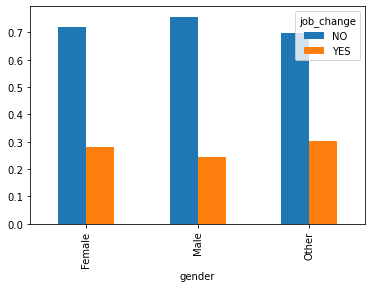

In [111]:
crosstab(hr.gender,hr.job_change)

job_change                      NO        YES
relevent_experience                          
Has relevent experience  78.531032  21.468968
No relevent experience   66.157287  33.842713


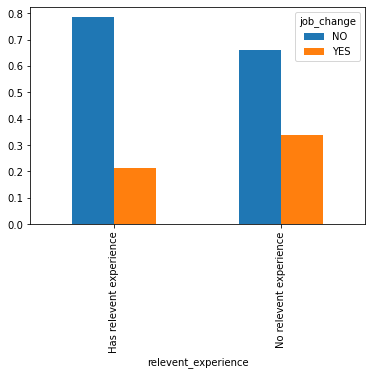

In [112]:
crosstab(hr.relevent_experience,hr.job_change)

job_change                  NO        YES
enrolled_university                      
Full time course     61.911099  38.088901
Part time course     74.791319  25.208681
no_enrollment        78.567908  21.432092


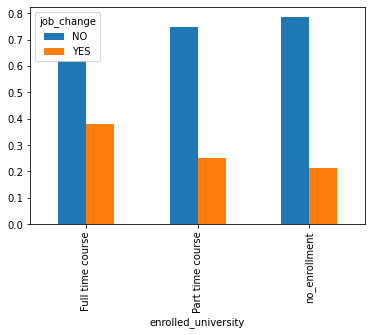

In [113]:
crosstab(hr.enrolled_university,hr.job_change)

job_change               NO        YES
major_discipline                      
Arts              79.051383  20.948617
Business Degree   73.700306  26.299694
Humanities        78.923767  21.076233
No Major          80.105402  19.894598
Other             73.228346  26.771654
STEM              73.840740  26.159260


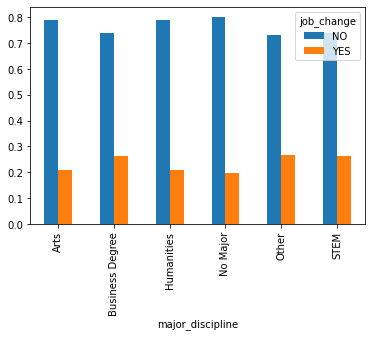

In [114]:
crosstab(hr.major_discipline,hr.job_change,)

job_change              NO        YES
education_level                      
Graduate         72.021038  27.978962
High School      79.839786  20.160214
Masters          78.559963  21.440037
Phd              85.990338  14.009662
Primary School   84.014870  15.985130


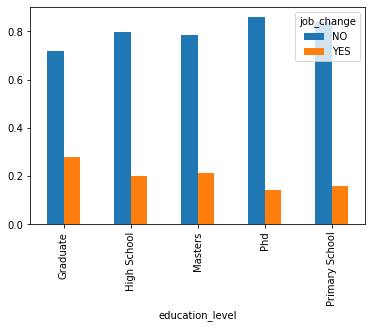

In [116]:
crosstab(hr.education_level,hr.job_change)

<Figure size 1440x1440 with 0 Axes>

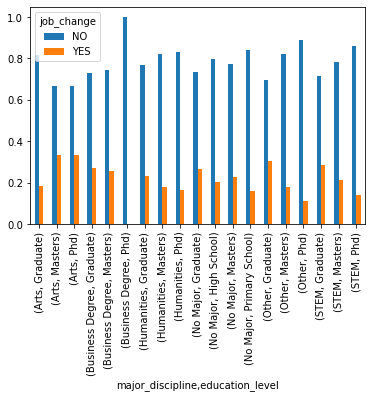

In [124]:
plt.figure(figsize=[20,20])
hr.groupby(["major_discipline","education_level"])["job_change"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.show()

job_change           NO        YES
company_size                      
100-500       83.634963  16.365037
1000-4999     82.566918  17.433082
10000+        80.931154  19.068846
49            76.614548  23.385452
50-99         67.403814  32.596186
500-999       82.668187  17.331813
5000-9999     81.882771  18.117229
<10           82.761251  17.238749


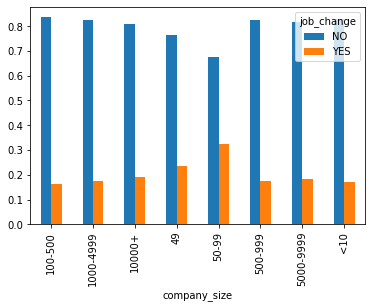

In [125]:
crosstab(hr.company_size,hr.job_change)

job_change                  NO        YES
company_type                             
Early Stage Startup  76.451078  23.548922
Funded Startup       86.013986  13.986014
NGO                  81.381958  18.618042
Other                61.459831  38.540169
Public Sector        78.010471  21.989529
Pvt Ltd              81.919120  18.080880


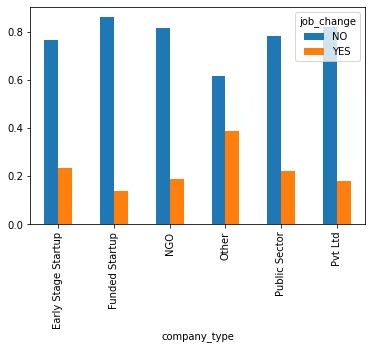

In [126]:
crosstab(hr.company_type,hr.job_change)

job_change           NO        YES
last_new_job                      
1             73.569652  26.430348
2             75.862069  24.137931
3             77.441406  22.558594
4             77.842566  22.157434
>4            81.762918  18.237082
never         68.939130  31.060870


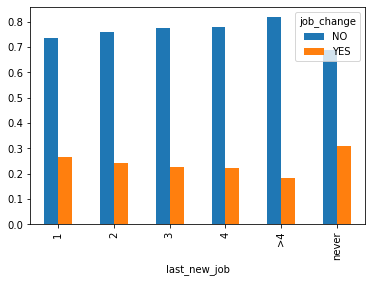

In [127]:
crosstab(hr.last_new_job,hr.job_change)

In [144]:
hr.groupby(["major_discipline"])["training_hours"].mean()

major_discipline
Arts               60.272727
Business Degree    66.189602
Humanities         65.635277
No Major           66.324111
Other              66.049869
STEM               65.206390
Name: training_hours, dtype: float64

In [145]:
hr.groupby(["education_level",])["training_hours"].mean()

education_level
Graduate          65.773409
High School       67.120605
Masters           63.270809
Phd               67.524155
Primary School    64.609665
Name: training_hours, dtype: float64

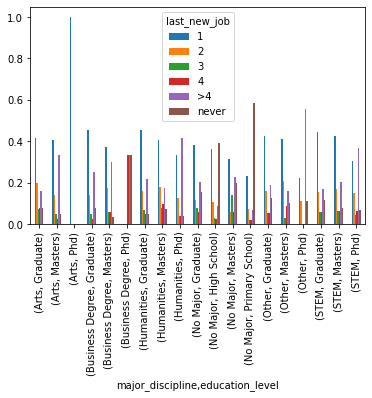

In [141]:
pd.crosstab([hr.major_discipline,hr.education_level],hr.last_new_job,normalize="index").plot.bar()
plt.show()

* 1.The ratio for job change of Yes to No is 75%:24%.
* 2.The no. of employess working in diff sectors are mostly males then female followed by others.
* 3.The gender looking for job change in increasing order is give by : other> female> male
* 4.People with no relevant experience are more likely to look for job.
* 5.The max no. of candidates have graduate degree followed by masters and lowest level of education is primary school.
* 6.Candidates with no major followed by stem and other as major discipline are enrolled in full time courses more lieky to pursure some form of higher education to upskill themseleves.
* 7.The 30% graduates with other as major discipline are actively looking for job change followed by 28% of graduates with stem as major dicipline as compare to other education level.
* 8.Highly educated individuals and those with less education are likely to be more steady in their current work compared to graduates, post graduates, high schools.  
* 9.On an average empoyees with 7 years of experience are willing for job change.
* 10.All major discipline have a avg mean training time og 65-68 hrs
*  => graduates are the ones that require the highest traing time 
*  => we can also seee that phd as education level requires less training time as comapred to the rest